In [1]:
import warnings
warnings.filterwarnings("ignore")
import MS
import scanpy as sc


scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.4 scipy==1.9.3 pandas==1.5.1 scikit-learn==1.1.2 statsmodels==0.13.2 python-igraph==0.10.2 pynndescent==0.5.7


### load the dataset

In [1]:
import pysodb
sodb = pysodb.SODB()
adata_dict = sodb.load_dataset('Dataset13_MS_raw')
adata = list(adata_dict.values())[0]

download experiment[Dataset13] in dataset[Dataset13_MS_raw]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1.64G/1.64G [02:18<00:00, 12.7MB/s]


load experiment[Dataset13] in dataset[Dataset13_MS_raw] from /home/yzy/anaconda3/envs/SODB/lib/python3.9/site-packages/pysodb-1.0.0-py3.9.egg/ysodb/cache/Dataset13_MS_raw/Dataset13.h5ad


In [2]:
adata

AnnData object with n_obs × n_vars = 734696 × 483
    obs: 'fov', 'volume', 'min_x', 'max_x', 'min_y', 'max_y', 'slice_id', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_300_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'ct'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'ct_colors', 'hvg', 'leiden', 'log1p', 'moranI', 'neighbors', 'pca', 'spatial_neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'blank_genes', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [13]:
# this dataset has multiple slices, indicated by the "slice_id" obs

## MS

In [10]:
# initialize the MS_multi object
msm = MS.MS_multi(
    adata,
    batch_obs = 'slice_id'
)


# set the number of scales, default is 15
msm.prepare()

msm.set_MS_para(
    n_scales=25
)

# construct the context-aware representation
msm.run_representation_mp(
    200
    # the number of processings
)



default number of process is 200
total batch: 9, running batch R1S1
total batch: 9, running batch R1S2
total batch: 9, running batch R1S3
total batch: 9, running batch R2S1
total batch: 9, running batch R2S2
total batch: 9, running batch R2S3
total batch: 9, running batch R3S1
total batch: 9, running batch R3S2
total batch: 9, running batch R3S3


In [11]:
msm.run_clustering_normal(
    -1
    # the clustering parameter
    # positive value for the number of clusters
    # negative value for the clustering resolution
)

IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


## output results

In [ ]:
# visualize first 3 slices for example

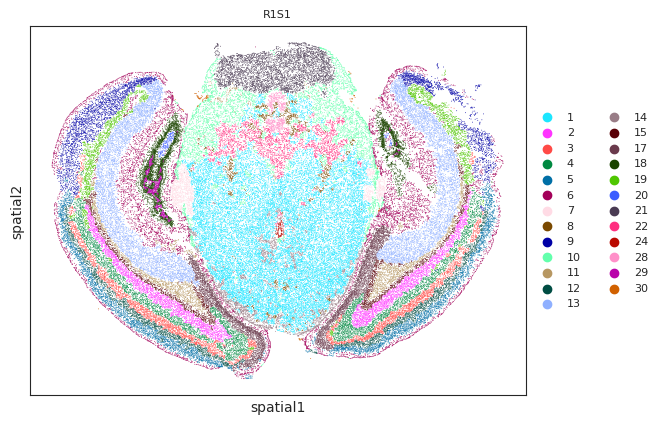

In [23]:
msm.output_cluster_single('MS_cluster_res1',idx=0)

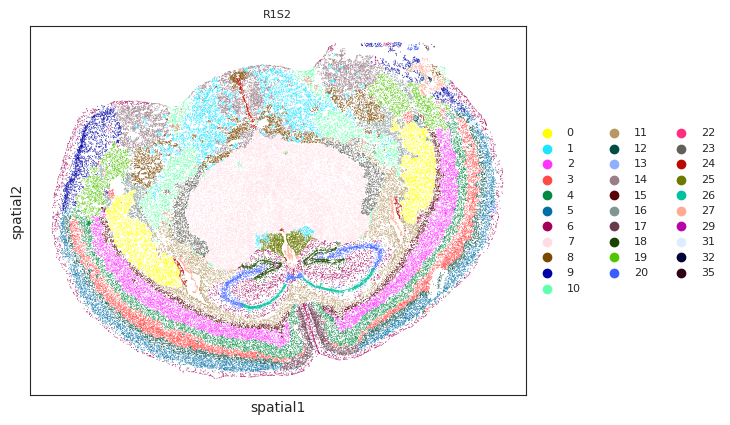

In [24]:
msm.output_cluster_single('MS_cluster_res1',idx=1)

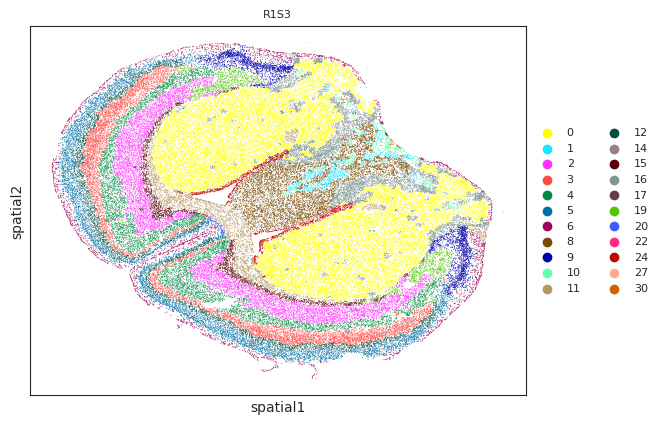

In [25]:
msm.output_cluster_single('MS_cluster_res1',idx=2)

## external application: Tissue Visualization via MS-View

In [16]:
msm.run_visualization_normal()

IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


generating color coding...
1.0 0.0


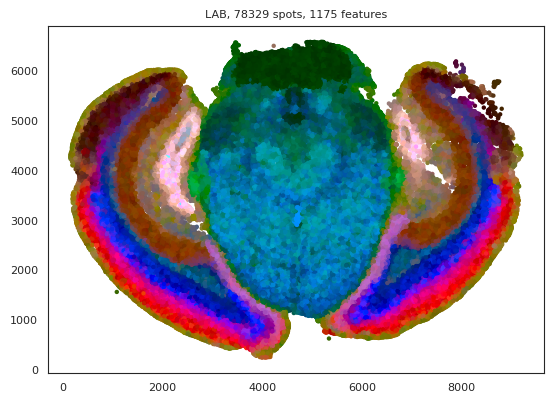

1.0 0.0


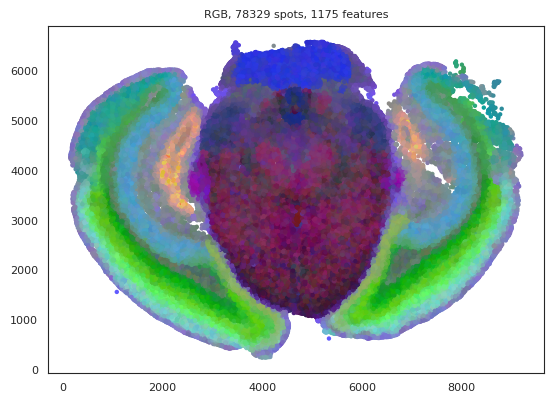

In [17]:
msm.output_visualization_single(
    dot_size=10,
    idx=0
    # control the size of cell
)

generating color coding...
1.0 0.0


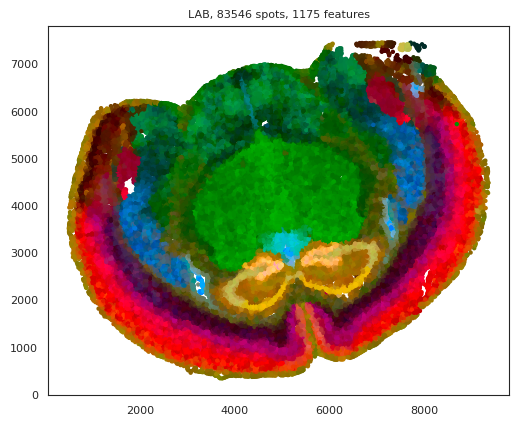

1.0 0.0


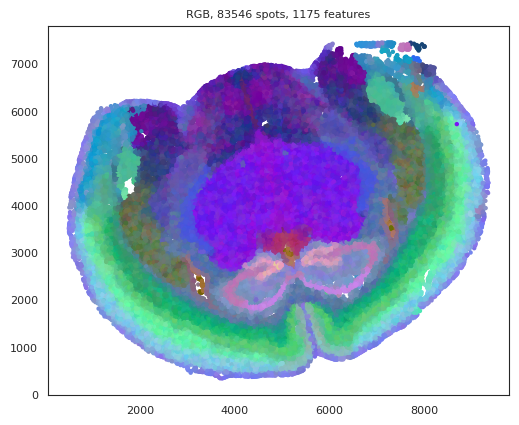

In [18]:
msm.output_visualization_single(
    dot_size=10,
    idx=1
    # control the size of cell
)

generating color coding...
1.0 0.0


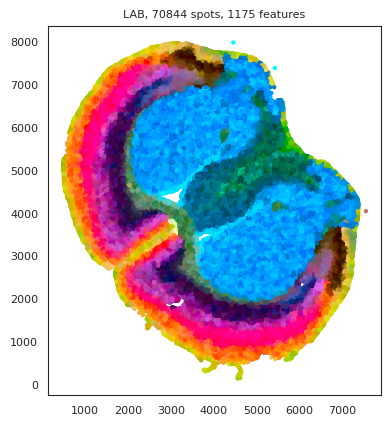

1.0 0.0


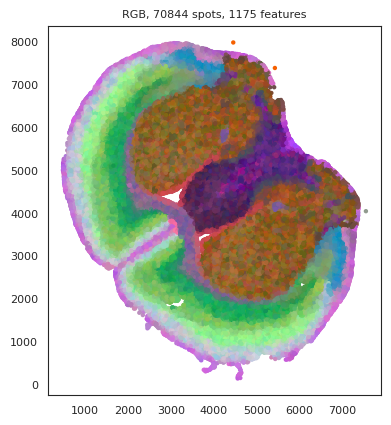

In [19]:
msm.output_visualization_single(
    dot_size=10,
    idx=2
    # control the size of cell
)

## save individual slice

In [20]:
import numpy as np
for si in np.unique(msm.adata_MS.obs['slice_id']):
    cur_a = msm.adata_MS[msm.adata_MS.obs['slice_id']==si]
    cur_a.write_h5ad(f'process/{data_use}_{si}.h5ad')

## save all slice

In [21]:
# save results
msm.adata_MS.write_h5ad(f'process/{data_use}.h5ad')